In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Tableau

Mounted at /content/drive
/content/drive/My Drive/Tableau


In [2]:
!pip install pillow pyheif


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 24.1 MB/s eta 0:00:00


In [6]:
from PIL import Image
import pyheif

heif_file = pyheif.read("ChoyeonAn.jpg")
image = Image.frombytes(
    heif_file.mode,
    heif_file.size,
    heif_file.data,
    "raw",
    heif_file.mode,
    heif_file.stride,
)
image.save("ChoyeonAn.png", "PNG")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('esg.csv', on_bad_lines='skip')
df

Country Name Country Code  \
0                                            Afghanistan          AFG   
1                                            Afghanistan          AFG   
2                                            Afghanistan          AFG   
3                                            Afghanistan          AFG   
4                                            Afghanistan          AFG   
...                                                  ...          ...   
16969                                                NaN          NaN   
16970                                                NaN          NaN   
16971                                                NaN          NaN   
16972  Data from database: Environment Social and Gov...          NaN   
16973                           Last Updated: 04/16/2024          NaN   

                                             Series Name        Series Code  \
0      Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
1                Access to electricity (% of population)     EG.ELC.ACCS.ZS   
2      Adjusted savings: natural resources depletion ...  NY.ADJ.DRES.GN.ZS   
3      Adjusted savings: net forest depletion (% of GNI)  NY.ADJ.DFOR.GN.ZS   
4                     Agricultural land (% of land area)     AG.LND.AGRI.ZS   
...                                                  ...                ...   
16969                                                NaN                NaN   
16970                                                NaN                NaN   
16971                                                NaN                NaN   
16972                                                NaN                NaN   
16973                                                NaN                NaN   

      1960 [YR1960]    1961 [YR1961]     1962 [YR1962]     1963 [YR1963]  \
0                ..               ..                ..                ..   
1                ..               ..                ..                ..   
2                ..               ..                ..                ..   
3                ..               ..                ..                ..   
4                ..  57.878355794735  57.9550158686353  58.0316759425356   
...             ...              ...               ...               ...   
16969           NaN              NaN               NaN               NaN   
16970           NaN              NaN               NaN               NaN   
16971           NaN              NaN               NaN               NaN   
16972           NaN              NaN               NaN               NaN   
16973           NaN              NaN               NaN               NaN   

          1964 [YR1964]    1965 [YR1965]  ...      2014 [YR2014]  \
0                    ..               ..  ...               25.7   
1                    ..               ..  ...               89.5   
2                    ..               ..  ...  0.315570916067545   
3                    ..               ..  ...  0.216608987713022   
4      58.1160020238259  58.123668031216  ...    58.123668031216   
...                 ...              ...  ...                ...   
16969               NaN              NaN  ...                NaN   
16970               NaN              NaN  ...                NaN   
16971               NaN              NaN  ...                NaN   
16972               NaN              NaN  ...                NaN   
16973               NaN              NaN  ...                NaN   

           2015 [YR2015]      2016 [YR2016]      2017 [YR2017]  \
0                  27.25               28.5                 30   
1                   71.5               97.7               97.7   
2      0.290260984624591  0.363282086046627    0.3508791651862   
3      0.232761963456803  0.284781431086284  0.229821540745866   
4        58.123668031216    58.123668031216    58.123668031216   
...                  ...                ...                ...   
16969                NaN  

In [4]:
df.isnull().sum()

Country Name     3
Country Code     5
Series Name      5
Series Code      5
1960 [YR1960]    5
                ..
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
Length: 68, dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(16969, 68)

# Only necessary Columns left!!!

In [7]:
df = df[df['Series Code'].isin(['EG.ELC.ACCS.ZS' , 'AG.LND.AGRI.ZS','EN.ATM.CO2E.PC','EG.ELC.COAL.ZS','EG.IMP.CONS.ZS'
,'EG.USE.PCAP.KG.OE','AG.PRD.FOOD.XD','AG.LND.FRST.ZS','EG.USE.COMM.FO.ZS','NY.GDP.MKTP.KD.ZG','EN.ATM.METH.PC'
,'EN.ATM.NOXE.PC','EN.ATM.PM25.MC.M3','EG.FEC.RNEW.ZS'])]

df

Country Name Country Code  \
1      Afghanistan          AFG   
4      Afghanistan          AFG   
10     Afghanistan          AFG   
15     Afghanistan          AFG   
16     Afghanistan          AFG   
...            ...          ...   
16921        World          WLD   
16937        World          WLD   
16940        World          WLD   
16944        World          WLD   
16956        World          WLD   

                                             Series Name        Series Code  \
1                Access to electricity (% of population)     EG.ELC.ACCS.ZS   
4                     Agricultural land (% of land area)     AG.LND.AGRI.ZS   
10                CO2 emissions (metric tons per capita)     EN.ATM.CO2E.PC   
15     Electricity production from coal sources (% of...     EG.ELC.COAL.ZS   
16                 Energy imports, net (% of energy use)     EG.IMP.CONS.ZS   
...                                                  ...                ...   
16921                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
16937  Methane emissions (metric tons of CO2 equivale...     EN.ATM.METH.PC   
16940  Nitrous oxide emissions (metric tons of CO2 eq...     EN.ATM.NOXE.PC   
16944  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
16956  Renewable energy consumption (% of total final...     EG.FEC.RNEW.ZS   

      1960 [YR1960]     1961 [YR1961]     1962 [YR1962]     1963 [YR1963]  \
1                ..                ..                ..                ..   
4                ..   57.878355794735  57.9550158686353  58.0316759425356   
10               ..                ..                ..                ..   
15               ..                ..                ..                ..   
16               ..                ..                ..                ..   
...             ...               ...               ...               ...   
16921            ..  3.77292394854005  5.37536049027972  5.19492739072032   
16937            ..                ..                ..                ..   
16940            ..                ..                ..                ..   
16944            ..                ..                ..                ..   
16956            ..                ..                ..                ..   

          1964 [YR1964]     1965 [YR1965]  ...      2014 [YR2014]  \
1                    ..                ..  ...               89.5   
4      58.1160020238259   58.123668031216  ...    58.123668031216   
10                   ..                ..  ...  0.283692395910162   
15                   ..                ..  ...                 ..   
16                   ..                ..  ...                 ..   
...                 ...               ...  ...                ...   
16921  6.56447589501926  5.57745136858455  ...   3.06700829835658   
16937                ..                ..  ...   1.11318028760425   
16940                ..                ..  ...  0.391803845464541   
16944                ..                ..  ...   47.6555911193097   
16956                ..                ..  ...   17.3801085884451   

           2015 [YR2015]      2016 [YR2016]      2017 [YR2017]  \
1                   71.5               97.7               97.7   
4        58.123668031216    58.123668031216    58.123668031216   
10     0.297971774718822  0.268358772656602  0.281195815732375   
15                    ..                 ..                 ..   
16                    ..                 ..                 ..   
...                  ...                ...                ...   
16921   3.06959305611582   2.78675707906703   3.39605661618111   
16937   1.10424371521628   1.09147511572158   1.09221026922614   
16940  0.390219823200625  0.388926874595311   0.39298624239801   
16944   46.4742509754182   45.7072654230576   42.8409676136455   
16956    17.424128501114   17.6767503798965   17.9191918096439   

           2018 [YR2018]      2019 [YR2019]      2020 [YR2020]  \
1       93.430877685546

In [8]:
melted_df = pd.melt(df, id_vars=['Country Name','Country Code','Series Name','Series Code'], var_name='Date', value_name='Value')
melted_df = melted_df.reset_index()
melted_df.shape

(214144, 7)

In [9]:
melted_df

index Country Name Country Code  \
0            0  Afghanistan          AFG   
1            1  Afghanistan          AFG   
2            2  Afghanistan          AFG   
3            3  Afghanistan          AFG   
4            4  Afghanistan          AFG   
...        ...          ...          ...   
214139  214139        World          WLD   
214140  214140        World          WLD   
214141  214141        World          WLD   
214142  214142        World          WLD   
214143  214143        World          WLD   

                                              Series Name        Series Code  \
0                 Access to electricity (% of population)     EG.ELC.ACCS.ZS   
1                      Agricultural land (% of land area)     AG.LND.AGRI.ZS   
2                  CO2 emissions (metric tons per capita)     EN.ATM.CO2E.PC   
3       Electricity production from coal sources (% of...     EG.ELC.COAL.ZS   
4                   Energy imports, net (% of energy use)     EG.IMP.CONS.ZS   
...                                                   ...                ...   
214139                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
214140  Methane emissions (metric tons of CO2 equivale...     EN.ATM.METH.PC   
214141  Nitrous oxide emissions (metric tons of CO2 eq...     EN.ATM.NOXE.PC   
214142  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
214143  Renewable energy consumption (% of total final...     EG.FEC.RNEW.ZS   

                 Date Value  
0       1960 [YR1960]    ..  
1       1960 [YR1960]    ..  
2       1960 [YR1960]    ..  
3       1960 [YR1960]    ..  
4       1960 [YR1960]    ..  
...               ...   ...  
214139  2023 [YR2023]    ..  
214140  2023 [YR2023]    ..  
214141  2023 [YR2023]    ..  
214142  2023 [YR2023]    ..  
214143  2023 [YR2023]    ..  

[214144 rows x 7 columns]

In [10]:
melted_df.to_csv('melted_df.csv')

In [11]:
afg = melted_df[melted_df['Country Code']=='AFG']
afg = afg[afg['Series Code']=='NY.GDP.MKTP.KD.ZG']
afg = afg.reset_index()
#afg.columns
afg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   level_0       64 non-null     int64 
 1   index         64 non-null     int64 
 2   Country Name  64 non-null     object
 3   Country Code  64 non-null     object
 4   Series Name   64 non-null     object
 5   Series Code   64 non-null     object
 6   Date          64 non-null     object
 7   Value         64 non-null     object
dtypes: int64(2), object(6)
memory usage: 4.1+ KB


In [12]:
afg.to_csv('afg.csv')

In [13]:
import pandas as pd

In [14]:
w_map = pd.read_csv('world_coordinates.csv')
w_map

Code               Country   latitude  longitude
0     AD               Andorra  42.546245   1.601554
1     AE  United Arab Emirates  23.424076  53.847818
2     AF           Afghanistan  33.939110  67.709953
3     AG   Antigua and Barbuda  17.060816 -61.796428
4     AI              Anguilla  18.220554 -63.068615
..   ...                   ...        ...        ...
239   YE                 Yemen  15.552727  48.516388
240   YT               Mayotte -12.827500  45.166244
241   ZA          South Africa -30.559482  22.937506
242   ZM                Zambia -13.133897  27.849332
243   ZW              Zimbabwe -19.015438  29.154857

[244 rows x 4 columns]

In [15]:
w_map = w_map.rename(columns={'Country':'Country Name'})
w_map

Code          Country Name   latitude  longitude
0     AD               Andorra  42.546245   1.601554
1     AE  United Arab Emirates  23.424076  53.847818
2     AF           Afghanistan  33.939110  67.709953
3     AG   Antigua and Barbuda  17.060816 -61.796428
4     AI              Anguilla  18.220554 -63.068615
..   ...                   ...        ...        ...
239   YE                 Yemen  15.552727  48.516388
240   YT               Mayotte -12.827500  45.166244
241   ZA          South Africa -30.559482  22.937506
242   ZM                Zambia -13.133897  27.849332
243   ZW              Zimbabwe -19.015438  29.154857

[244 rows x 4 columns]

In [16]:
melted_df['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 

In [17]:
combi = pd.merge(melted_df, w_map, how='inner', on=['Country Name'])
combi

index Country Name Country Code  \
0            0  Afghanistan          AFG   
1            1  Afghanistan          AFG   
2            2  Afghanistan          AFG   
3            3  Afghanistan          AFG   
4            4  Afghanistan          AFG   
...        ...          ...          ...   
144251  213495     Zimbabwe          ZWE   
144252  213496     Zimbabwe          ZWE   
144253  213497     Zimbabwe          ZWE   
144254  213498     Zimbabwe          ZWE   
144255  213499     Zimbabwe          ZWE   

                                              Series Name        Series Code  \
0                 Access to electricity (% of population)     EG.ELC.ACCS.ZS   
1                      Agricultural land (% of land area)     AG.LND.AGRI.ZS   
2                  CO2 emissions (metric tons per capita)     EN.ATM.CO2E.PC   
3       Electricity production from coal sources (% of...     EG.ELC.COAL.ZS   
4                   Energy imports, net (% of energy use)     EG.IMP.CONS.ZS   
...                                                   ...                ...   
144251                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
144252  Methane emissions (metric tons of CO2 equivale...     EN.ATM.METH.PC   
144253  Nitrous oxide emissions (metric tons of CO2 eq...     EN.ATM.NOXE.PC   
144254  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
144255  Renewable energy consumption (% of total final...     EG.FEC.RNEW.ZS   

                 Date Value Code   latitude  longitude  
0       1960 [YR1960]    ..   AF  33.939110  67.709953  
1       1960 [YR1960]    ..   AF  33.939110  67.709953  
2       1960 [YR1960]    ..   AF  33.939110  67.709953  
3       1960 [YR1960]    ..   AF  33.939110  67.709953  
4       1960 [YR1960]    ..   AF  33.939110  67.709953  
...               ...   ...  ...        ...        ...  
144251  2023 [YR2023]    ..   ZW -19.015438  29.154857  
144252  2023 [YR2023]    ..   ZW -19.015438  29.154857  
144253  2023 [YR2023]    ..   ZW -19.015438  29.154857  
144254  2023 [YR2023]    ..   ZW -19.015438  29.154857  
144255  2023 [YR2023]    ..   ZW -19.015438  29.154857  

[144256 rows x 10 columns]

In [18]:
combi.isnull().sum()

index             0
Country Name      0
Country Code      0
Series Name       0
Series Code       0
Date              0
Value             0
Code            896
latitude          0
longitude         0
dtype: int64

In [19]:
combi[combi['Code'].isnull()]

index Country Name Country Code  \
92288    1680      Namibia          NAM   
92289    1681      Namibia          NAM   
92290    1682      Namibia          NAM   
92291    1683      Namibia          NAM   
92292    1684      Namibia          NAM   
...       ...          ...          ...   
93179  212487      Namibia          NAM   
93180  212488      Namibia          NAM   
93181  212489      Namibia          NAM   
93182  212490      Namibia          NAM   
93183  212491      Namibia          NAM   

                                             Series Name        Series Code  \
92288            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
92289                 Agricultural land (% of land area)     AG.LND.AGRI.ZS   
92290             CO2 emissions (metric tons per capita)     EN.ATM.CO2E.PC   
92291  Electricity production from coal sources (% of...     EG.ELC.COAL.ZS   
92292              Energy imports, net (% of energy use)     EG.IMP.CONS.ZS   
...                                                  ...                ...   
93179                              GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
93180  Methane emissions (metric tons of CO2 equivale...     EN.ATM.METH.PC   
93181  Nitrous oxide emissions (metric tons of CO2 eq...     EN.ATM.NOXE.PC   
93182  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   
93183  Renewable energy consumption (% of total final...     EG.FEC.RNEW.ZS   

                Date Value Code  latitude  longitude  
92288  1960 [YR1960]    ..  NaN -22.95764   18.49041  
92289  1960 [YR1960]    ..  NaN -22.95764   18.49041  
92290  1960 [YR1960]    ..  NaN -22.95764   18.49041  
92291  1960 [YR1960]    ..  NaN -22.95764   18.49041  
92292  1960 [YR1960]    ..  NaN -22.95764   18.49041  
...              ...   ...  ...       ...        ...  
93179  2023 [YR2023]    ..  NaN -22.95764   18.49041  
93180  2023 [YR2023]    ..  NaN -22.95764   18.49041  
93181  2023 [YR2023]    ..  NaN -22.95764   18.49041  
93182  2023 [YR2023]    ..  NaN -22.95764   18.49041  
93183  2023 [YR2023]    ..  NaN -22.95764   18.49041  

[896 rows x 10 columns]

In [20]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144256 entries, 0 to 144255
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         144256 non-null  int64  
 1   Country Name  144256 non-null  object 
 2   Country Code  144256 non-null  object 
 3   Series Name   144256 non-null  object 
 4   Series Code   144256 non-null  object 
 5   Date          144256 non-null  object 
 6   Value         144256 non-null  object 
 7   Code          143360 non-null  object 
 8   latitude      144256 non-null  float64
 9   longitude     144256 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 11.0+ MB


In [21]:
combi = combi.replace('..', 0)

In [22]:
combi['Value'] = combi['Value'].astype('float64')

In [23]:
res = combi.groupby(['Country Name','Series Name'])['Value'].mean().reset_index()
#res[res['Country Name']=='Poland']
res[res['Series Name']=='CO2 emissions (metric tons per capita)'].sort_values('Value', ascending=False)

Country Name                             Series Name  \
1710                     Qatar  CO2 emissions (metric tons per capita)   
2172      United Arab Emirates  CO2 emissions (metric tons per capita)   
1094                    Kuwait  CO2 emissions (metric tons per capita)   
156                    Bahrain  CO2 emissions (metric tons per capita)   
1206                Luxembourg  CO2 emissions (metric tons per capita)   
...                        ...                                     ...   
1892                   Somalia  CO2 emissions (metric tons per capita)   
408   Central African Republic  CO2 emissions (metric tons per capita)   
352                    Burundi  CO2 emissions (metric tons per capita)   
1374                    Monaco  CO2 emissions (metric tons per capita)   
1766                San Marino  CO2 emissions (metric tons per capita)   

          Value  
1710  18.581209  
2172  12.073524  
1094  11.393621  
156   10.684929  
1206  10.301600  
...         ...  
1892   0.030215  
408    0.023525  
352    0.017596  
1374   0.000000  
1766   0.000000  

[161 rows x 3 columns]

In [24]:
combi.to_csv('combi1.csv')

In [25]:
pivot_combi = combi.pivot(index=['Date','Country Name','latitude','longitude'], columns='Series Name', values='Value').reset_index()
pivot_combi

Series Name           Date Country Name   latitude   longitude  \
0            1960 [YR1960]  Afghanistan  33.939110   67.709953   
1            1960 [YR1960]      Albania  41.153332   20.168331   
2            1960 [YR1960]      Algeria  28.033886    1.659626   
3            1960 [YR1960]      Andorra  42.546245    1.601554   
4            1960 [YR1960]       Angola -11.202692   17.873887   
...                    ...          ...        ...         ...   
10299        2023 [YR2023]      Uruguay -32.522779  -55.765835   
10300        2023 [YR2023]   Uzbekistan  41.377491   64.585262   
10301        2023 [YR2023]      Vanuatu -15.376706  166.959158   
10302        2023 [YR2023]       Zambia -13.133897   27.849332   
10303        2023 [YR2023]     Zimbabwe -19.015438   29.154857   

Series Name  Access to electricity (% of population)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
10299                                            0.0   
10300                                            0.0   
10301                                            0.0   
10302                                            0.0   
10303                                            0.0   

Series Name  Agricultural land (% of land area)  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
10299                                       0.0   
10300                                       0.0   
10301                                       0.0   
10302                                       0.0   
10303                                       0.0   

Series Name  CO2 emissions (metric tons per capita)  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
10299                                           0.0   
10300                                           0.0   
10301                                           0.0   
10302                                           0.0   
10303                                           0.0   

Series Name  Electricity production from coal sources (% of total)  \
0                                                          0.0       
1                                                          0.0       
2                                                          0.0       
3                                                          0.0       
4                                                          0.0       
...                                                        ...       
10299                                                      0.0       
10300                                                      0.0       
10301                                                      0.0       
10302                                                      0.0       
10303                                                      0.0       

Series Name  Energy imports, net (% of energy use)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
10299                                    

In [26]:
pivot_combi.isnull().sum()

Series Name
Date                                                                      0
Country Name                                                              0
latitude                                                                  0
longitude                                                                 0
Access to electricity (% of population)                                   0
Agricultural land (% of land area)                                        0
CO2 emissions (metric tons per capita)                                    0
Electricity production from coal sources (% of total)                     0
Energy imports, net (% of energy use)                                     0
Energy use (kg of oil equivalent per capita)                              0
Food production index (2014-2016 = 100)                                   0
Forest area (% of land area)                                              0
Fossil fuel energy consumption (% of total)                               0


In [29]:
pivot_combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10304 entries, 0 to 10303
Data columns (total 18 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Date                                                                    10304 non-null  object 
 1   Country Name                                                            10304 non-null  object 
 2   latitude                                                                10304 non-null  float64
 3   longitude                                                               10304 non-null  float64
 4   Access to electricity (% of population)                                 10304 non-null  float64
 5   Agricultural land (% of land area)                                      10304 non-null  float64
 6   CO2 emissions (metric tons per capita)                                  10304 

In [28]:
pivot_combi = pivot_combi.replace('..', 0)
pivot_combi

Series Name           Date Country Name   latitude   longitude  \
0            1960 [YR1960]  Afghanistan  33.939110   67.709953   
1            1960 [YR1960]      Albania  41.153332   20.168331   
2            1960 [YR1960]      Algeria  28.033886    1.659626   
3            1960 [YR1960]      Andorra  42.546245    1.601554   
4            1960 [YR1960]       Angola -11.202692   17.873887   
...                    ...          ...        ...         ...   
10299        2023 [YR2023]      Uruguay -32.522779  -55.765835   
10300        2023 [YR2023]   Uzbekistan  41.377491   64.585262   
10301        2023 [YR2023]      Vanuatu -15.376706  166.959158   
10302        2023 [YR2023]       Zambia -13.133897   27.849332   
10303        2023 [YR2023]     Zimbabwe -19.015438   29.154857   

Series Name  Access to electricity (% of population)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
10299                                            0.0   
10300                                            0.0   
10301                                            0.0   
10302                                            0.0   
10303                                            0.0   

Series Name  Agricultural land (% of land area)  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
10299                                       0.0   
10300                                       0.0   
10301                                       0.0   
10302                                       0.0   
10303                                       0.0   

Series Name  CO2 emissions (metric tons per capita)  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
10299                                           0.0   
10300                                           0.0   
10301                                           0.0   
10302                                           0.0   
10303                                           0.0   

Series Name  Electricity production from coal sources (% of total)  \
0                                                          0.0       
1                                                          0.0       
2                                                          0.0       
3                                                          0.0       
4                                                          0.0       
...                                                        ...       
10299                                                      0.0       
10300                                                      0.0       
10301                                                      0.0       
10302                                                      0.0       
10303                                                      0.0       

Series Name  Energy imports, net (% of energy use)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
10299                                    

In [74]:
cor_combi = []
for con in pivot_combi['Country Name'].unique():

  cor = pivot_combi[pivot_combi['Country Name']==con].select_dtypes(exclude=['object']).corr()
  cor['country']=con
  cor_combi.append(cor)

cor_combi_final = pd.concat(cor_combi)

In [75]:
cor_combi_final = cor_combi_final.drop(['latitude','longitude'])
cor_combi_final = cor_combi_final.drop(columns=['latitude','longitude'])
cor_combi_final

Series Name                                         Access to electricity (% of population)  \
Series Name                                                                                   
Access to electricity (% of population)                                            1.000000   
Agricultural land (% of land area)                                                 0.132705   
CO2 emissions (metric tons per capita)                                             0.772789   
Electricity production from coal sources (% of ...                                      NaN   
Energy imports, net (% of energy use)                                                   NaN   
...                                                                                     ...   
GDP growth (annual %)                                                             -0.216163   
Methane emissions (metric tons of CO2 equivalen...                                 0.858662   
Nitrous oxide emissions (metric tons of CO2 equ...                                 0.800670   
PM2.5 air pollution, mean annual exposure (micr...                                 0.507388   
Renewable energy consumption (% of total final ...                                 0.893682   

Series Name                                         Agricultural land (% of land area)  \
Series Name                                                                              
Access to electricity (% of population)                                       0.132705   
Agricultural land (% of land area)                                            1.000000   
CO2 emissions (metric tons per capita)                                        0.161772   
Electricity production from coal sources (% of ...                                 NaN   
Energy imports, net (% of energy use)                                              NaN   
...                                                                                ...   
GDP growth (annual %)                                                        -0.103038   
Methane emissions (metric tons of CO2 equivalen...                            0.622925   
Nitrous oxide emissions (metric tons of CO2 equ...                            0.583115   
PM2.5 air pollution, mean annual exposure (micr...                            0.399304   
Renewable energy consumption (% of total final ...                            0.645643   

Series Name                                         CO2 emissions (metric tons per capita)  \
Series Name                                                                                  
Access to electricity (% of population)                                           0.772789   
Agricultural land (% of land area)                                                0.161772   
CO2 emissions (metric tons per capita)                                            1.000000   
Electricity production from coal sources (% of ...                                     NaN   
Energy imports, net (% of energy use)                                                  NaN   
...                                                                                    ...   
GDP growth (annual %)                                                            -0.170723   
Methane emissions (metric tons of CO2 equivalen...                                0.895277   
Nitrous oxide emissions (metric tons of CO2 equ...                                0.942578   
PM2.5 air pollution, mean annual exposure (micr...                                0.401262   
Renewable energy consumption (% of total final ...                                0.840848   

Series Name                                         Electricity production from coal sources (% of total)  \
Series Name                                                                                                 
Access to electricity (% of population)                                                           NaN       
Agricultural land (% of land area)         

In [77]:
cor_combi_final.reset_index('Series Name')
cor_combi_final = cor_combi_final.fillna(0)
cor_combi_final

Series Name                                         Access to electricity (% of population)  \
Series Name                                                                                   
Access to electricity (% of population)                                            1.000000   
Agricultural land (% of land area)                                                 0.132705   
CO2 emissions (metric tons per capita)                                             0.772789   
Electricity production from coal sources (% of ...                                 0.000000   
Energy imports, net (% of energy use)                                              0.000000   
...                                                                                     ...   
GDP growth (annual %)                                                             -0.216163   
Methane emissions (metric tons of CO2 equivalen...                                 0.858662   
Nitrous oxide emissions (metric tons of CO2 equ...                                 0.800670   
PM2.5 air pollution, mean annual exposure (micr...                                 0.507388   
Renewable energy consumption (% of total final ...                                 0.893682   

Series Name                                         Agricultural land (% of land area)  \
Series Name                                                                              
Access to electricity (% of population)                                       0.132705   
Agricultural land (% of land area)                                            1.000000   
CO2 emissions (metric tons per capita)                                        0.161772   
Electricity production from coal sources (% of ...                            0.000000   
Energy imports, net (% of energy use)                                         0.000000   
...                                                                                ...   
GDP growth (annual %)                                                        -0.103038   
Methane emissions (metric tons of CO2 equivalen...                            0.622925   
Nitrous oxide emissions (metric tons of CO2 equ...                            0.583115   
PM2.5 air pollution, mean annual exposure (micr...                            0.399304   
Renewable energy consumption (% of total final ...                            0.645643   

Series Name                                         CO2 emissions (metric tons per capita)  \
Series Name                                                                                  
Access to electricity (% of population)                                           0.772789   
Agricultural land (% of land area)                                                0.161772   
CO2 emissions (metric tons per capita)                                            1.000000   
Electricity production from coal sources (% of ...                                0.000000   
Energy imports, net (% of energy use)                                             0.000000   
...                                                                                    ...   
GDP growth (annual %)                                                            -0.170723   
Methane emissions (metric tons of CO2 equivalen...                                0.895277   
Nitrous oxide emissions (metric tons of CO2 equ...                                0.942578   
PM2.5 air pollution, mean annual exposure (micr...                                0.401262   
Renewable energy consumption (% of total final ...                                0.840848   

Series Name                                         Electricity production from coal sources (% of total)  \
Series Name                                                                                                 
Access to electricity (% of population)                                                      0.000000       
Agricultural land (% of land area)         

In [78]:
cor_combi_final.to_csv('cor_combi_final.csv')

<Axes: xlabel='Series Name', ylabel='Series Name'>

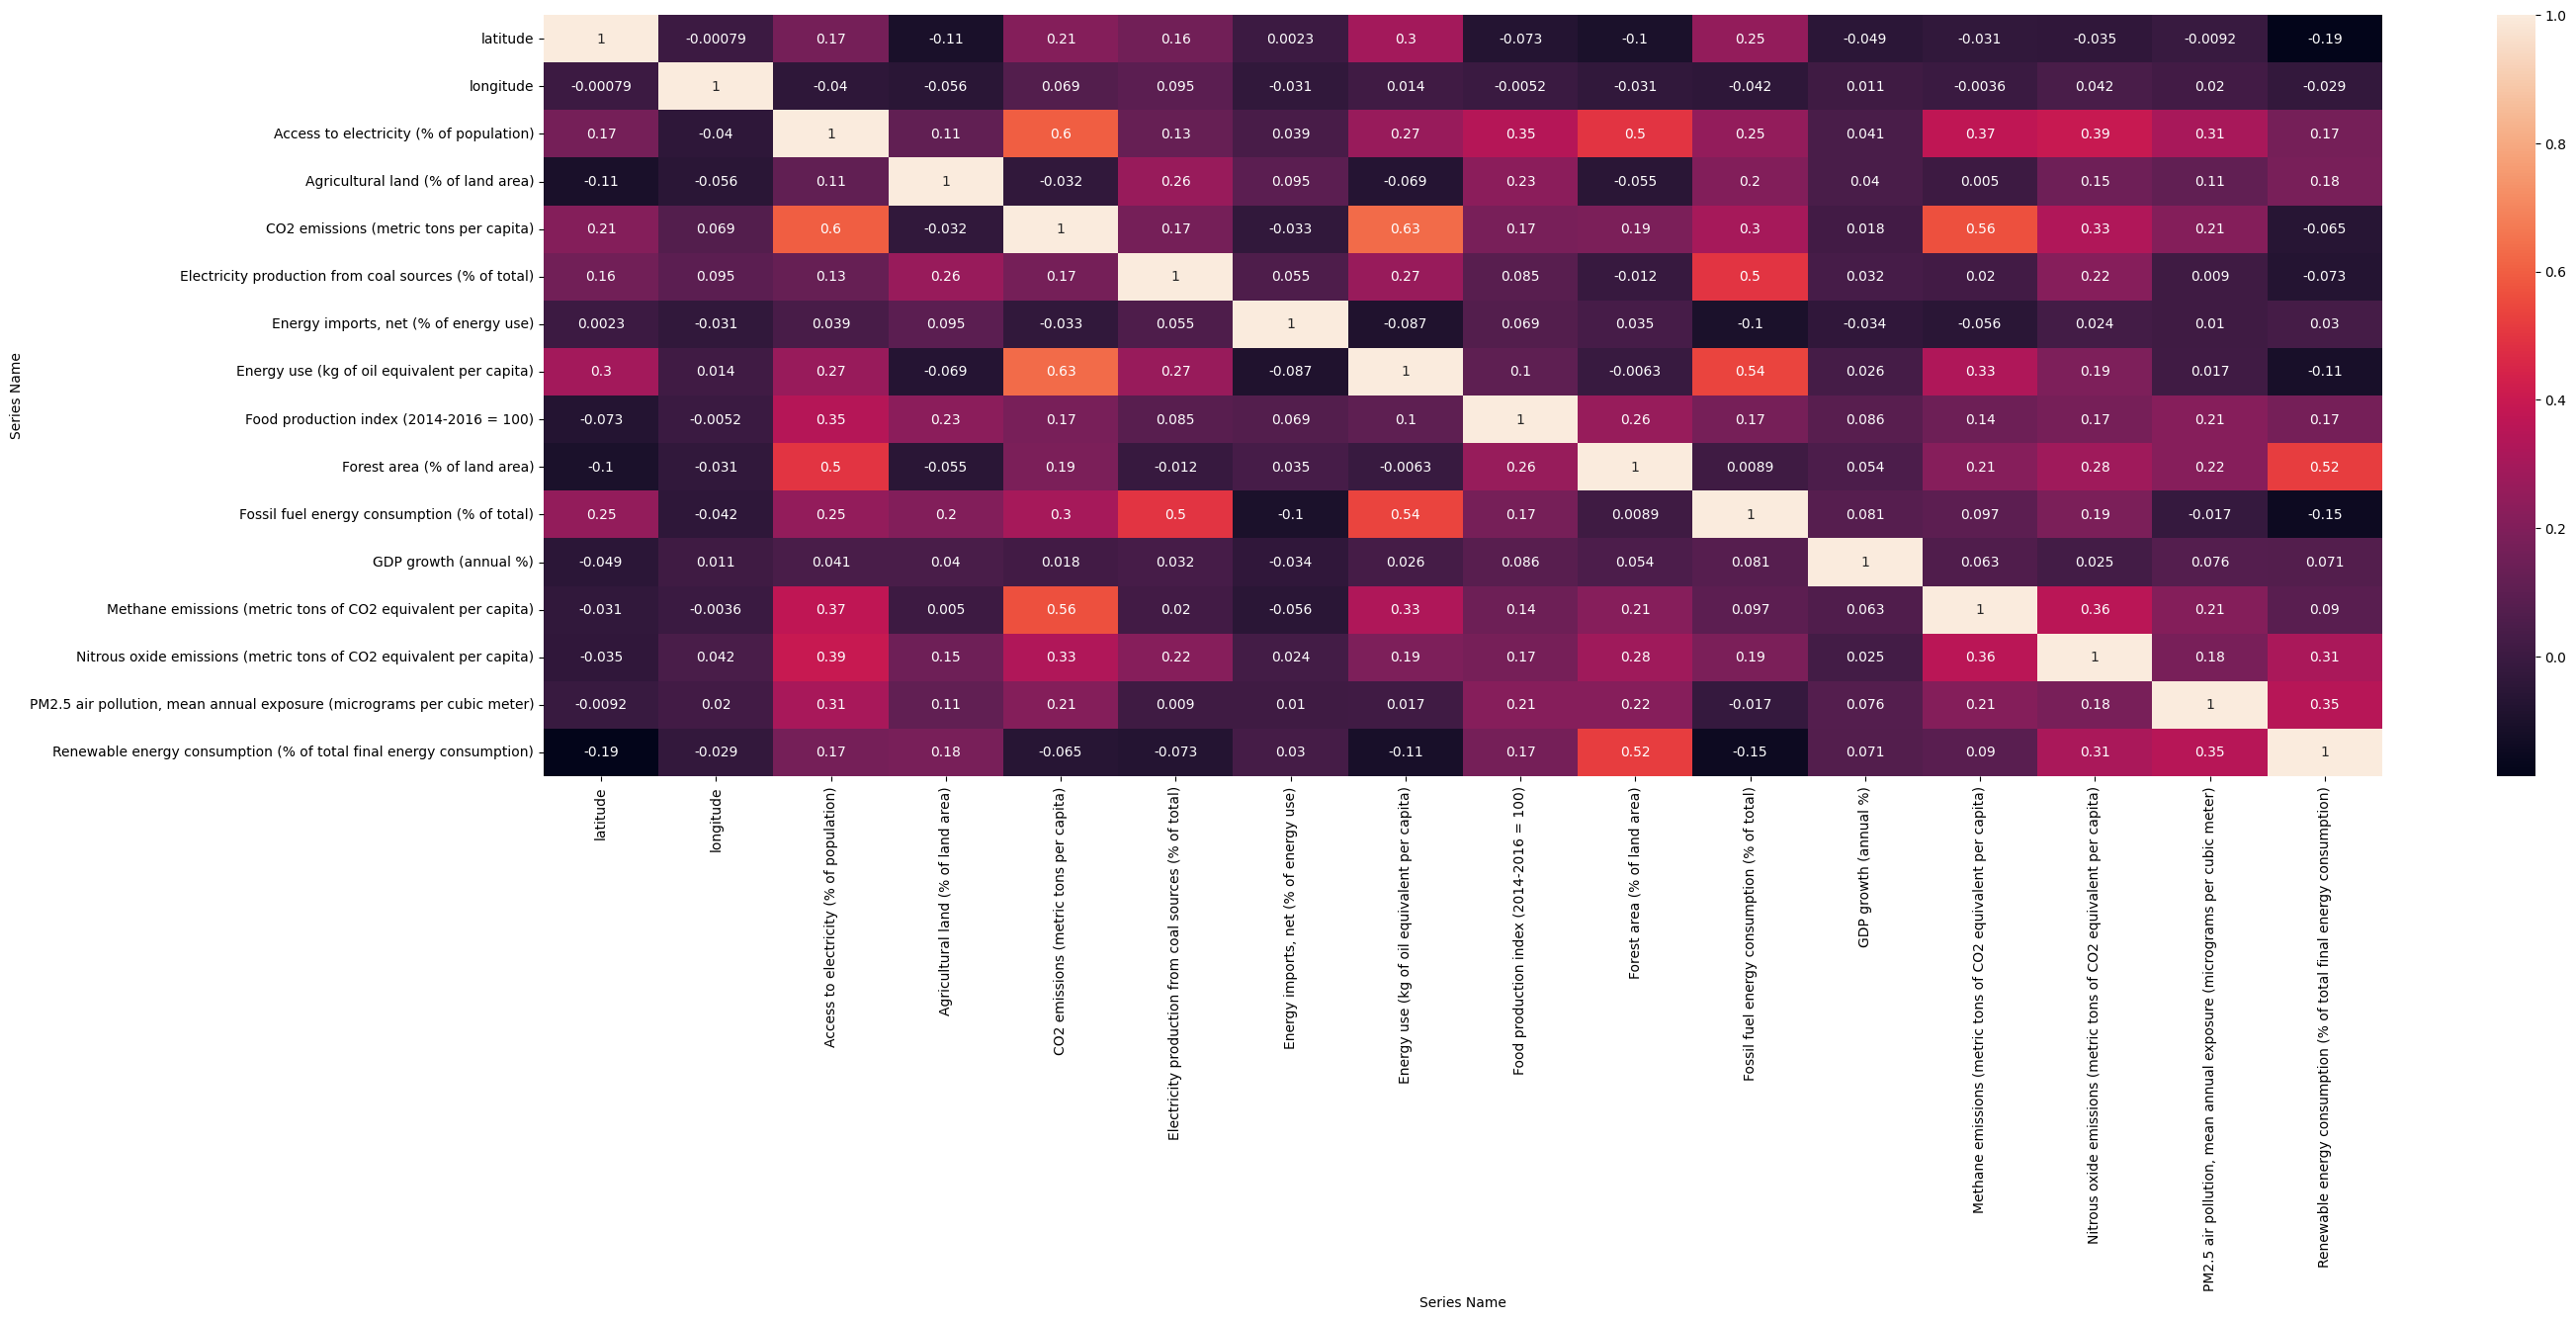

In [28]:
plt.figure(figsize=(30,10))
sns.heatmap(cor, annot=True)

In [29]:
pivot_combi.to_csv('pivot_combi.csv')

In [79]:

data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    'city1': [5,6,10,15,20,25,28,27,22,16,10,6],
    'city2': [7,8,12,17,22,27,30,29,24,18,12,8],
    'city3': [6,7,11,16,21,26,29,28,23,17,11,7]
}

df = pd.DataFrame(data)
df.to_csv('df.csv')

In [80]:
df

Month  city1  city2  city3
0    Jan      5      7      6
1    Feb      6      8      7
2    Mar     10     12     11
3    Apr     15     17     16
4    May     20     22     21
5    Jun     25     27     26
6    Jul     28     30     29
7    Aug     27     29     28
8    Sep     22     24     23
9    Oct     16     18     17
10   Nov     10     12     11
11   Dec      6      8      7